This notebook is created for self learning purposes, Most of the things are taken from - https://github.com/seg/tutorials-2018/blob/master/1806_Time-frequency/Manuscript.ipynb. I have added some modifications and tried the code on recent Alaska earthquake

In [725]:
%matplotlib inline
# importing the necessities
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

import seaborn as sns
sns.set()

Now lets create a sine wave, this sine wave has an amplitude 'a' and frequency f, it means it's time period is scaled by f.

In [726]:
# defining a sine wave
def sin_wave(f, a, duration, sample_rate):
    t = np.arange(0,duration,1/sample_rate)  # start, stop, stepsize
    return a*np.sin(2*np.pi*f*t),t
    # sampling_rate = time steps

In [727]:
s,t = sin_wave(f = 261.63, a=1, duration = 3, sample_rate = 10e3)

Now this sine wave contains single frequency(isotonic) and is stationary(the frequency of this wave does not change with time)

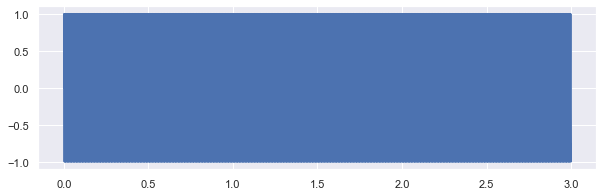

In [728]:
plt.figure(figsize=(10,3))
plt.plot(t,s)

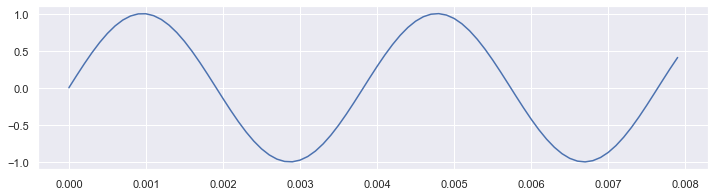

In [729]:
plt.figure(figsize=(12,3))
plt.plot(t[0:80],s[0:80])

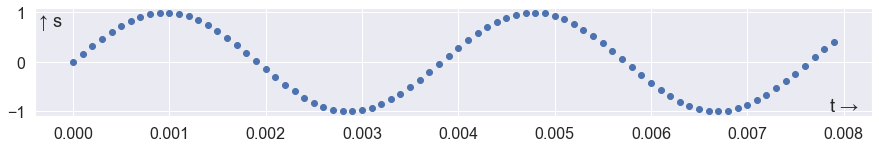

In [730]:
fig, ax = plt.subplots(figsize=(15,2))  # remember plt.subplots(nrows,ncols)
ax.plot(t[:80],s[:80],'o')
ax.tick_params(axis='both',labelsize=16) #ax.tick_params = changes the appearance of tick marks, axis,labelsize
ax.text(-0.00035, 1, "↑ s", fontsize=18, va='top') # notice the first and second are the x, y coordiates for the positioning of the label
ax.text(0.00815, -1, "t →", fontsize=18, ha='right')
plt.show()

In [731]:
from IPython.display import Audio   #Now this is a great tool to hear audio in python #Noise processing

In [732]:
fs = 10e3
Audio(s,rate=fs)  #https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html
# try to listen the different frequencies, its fun!!, low frequencies are like male's voice whereas the high frequencies are female's voice

If we wanted to know the frequency of this signal, we could assume that it's a pure tone and simply count the number of cycles per unit time. But natural signals are rarely monotones, so let's make a more interesting signal. We can use our function to make the C-major chord with 3 notes, C4, E4, and G4 by passing column vectors (by reshaping the arrays) for frequency f and amplitude a:

Below are Polytonic signals but stationary in the sense, their frequency does not change with time

In [733]:
f = np.array([261.6, 329.6, 392.0])
a = np.array([1.5,0.5,1])
s,t = sin_wave(f=f.reshape(3,1),a=a.reshape(3,1),duration = 0.25, sample_rate = 10e3)

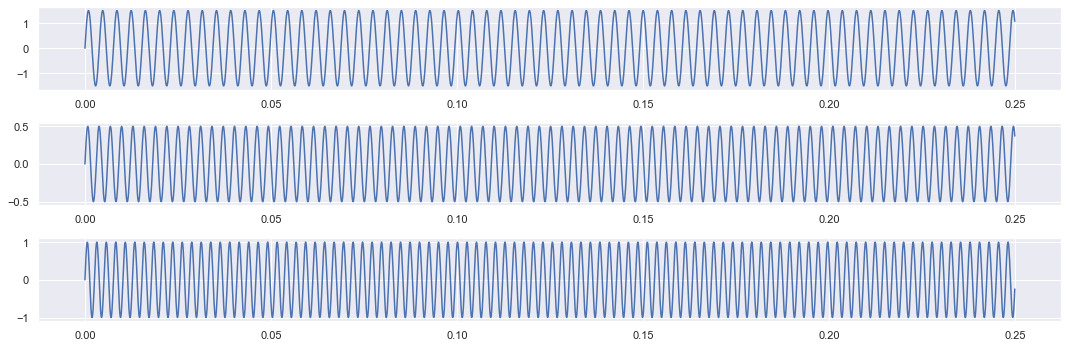

In [734]:
fig,axs = plt.subplots(nrows=3,figsize=(15,5))
axs[0].plot(t,s[0])
axs[1].plot(t,s[1])
axs[2].plot(t,s[2])
fig.tight_layout()  # to set the correct spacings between subplots

In [735]:
s = np.sum(s,axis = 0)  # set axis = 1 for horizontal summation.

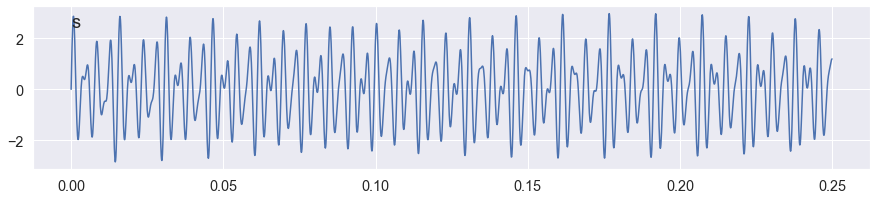

In [736]:
fig,ax = plt.subplots(figsize=(15,3))
fig = plt.plot(t,s)
ax.tick_params(axis='both',labelsize='large')
ax.text(0.0,3,"s",fontsize=18,va='top')
plt.show()

In [737]:
fs = 10e3
Audio(s,rate=fs)

# The Fourier transform
Although this mixed or polytonic signal is just the sum of three pure tones, it is no longer a trivial matter to figure out the components. This is where the Fourier transform comes in.
First we taper the signal by multiplying it by a window function. Ideal pure tones have infinite duration, and the tapering helps prevent the edges of our finite signal from interfering with the Fourier transform.

In [738]:
S = np.fft.fft(s)

In [739]:
freq = np.fft.fftfreq(s.size, d=1/10e3)

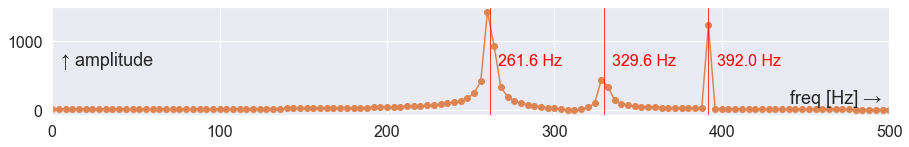

In [740]:
x, y = freq[:S.size//2], np.abs(S[:S.size//2])

fig, ax = plt.subplots(figsize=(15, 2))
ax.plot(x, y, 'o-', color='C1')
ax.set_xlim(0, 500)
for note in f:
    ax.axvline(note, c='red', lw=0.75)
    ax.text(note+5, 650, f"{note} Hz", color='red', size=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.text(5, 650, "↑ amplitude", fontsize=18)
ax.text(495, 100, "freq [Hz] →", fontsize=18, ha='right')
plt.show()

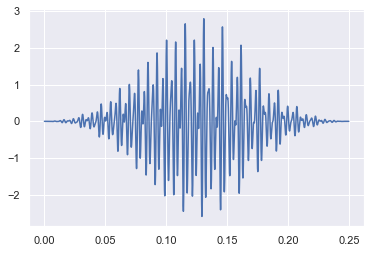

In [741]:
s = s*np.blackman(s.size) #https://numpy.org/doc/stable/reference/generated/numpy.blackman.html
plt.plot(t,s)  # signal in time domain   #Blackman window is good window for tapering, If we take fourier transform without 
# tapering it causes the gibbs phenomenon.

In [742]:
fs = 10e3
Audio(s,rate=fs)

In [743]:
S = np.fft.fft(s) #fast fourier transform of the data

In [744]:
freq = np.fft.fftfreq(s.size, d=1/10e3)  # the frequencies in our signal, # just remember our signals will contain all frequencies from 0 to 
# ... 0.5*(sampling_rate)

Some more points about freq
so we have our timing interval say 0.25 seconds.
what's the minimum frequency we can take out from this?
that will be the frequency at which we sample the whole duration at once ?
i.e. 1/0.25 
similarly if we have 2 cycles in 0.25 interval i.e. 2/0.25
similarly 3/0.25, 4/0.25, 5/0.25, .... 1249/0.25.. 
We have to take care that our sampling frequency is atleast greater or equal to maximum frequency in the waveform.

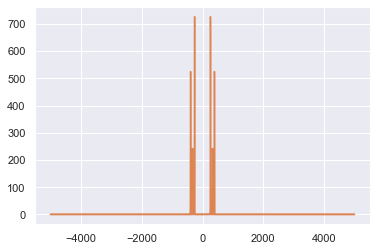

In [745]:
#Notice that 
plt.plot(freq, abs(S), color='C1')
plt.show()

There are negative frequencies in our freq!!, 
In general for a real valued signals, we are only interested in positive frequencies, However if we discard them completely, the 
inverse fourier transform will return a signal only half as long as our original signal, so we keep the negative frequencies, but use
temporary x and y variable for plotting

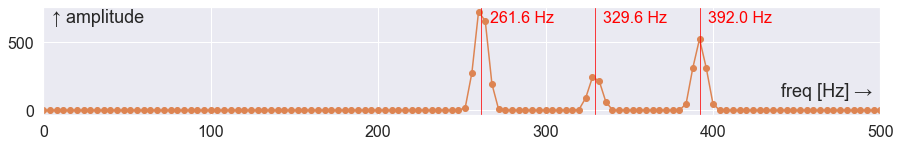

In [746]:
x, y = freq[:S.size//2], np.abs(S[:S.size//2])

fig, ax = plt.subplots(figsize=(15, 2))
ax.plot(x, y, 'o-', color='C1')
ax.set_xlim(0, 500)
for note in f:
    ax.axvline(note, c='red', lw=0.75)
    ax.text(note+5, 650, f"{note} Hz", color='red', size=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.text(5, 650, "↑ amplitude", fontsize=18)
ax.text(495, 100, "freq [Hz] →", fontsize=18, ha='right')
plt.show()

So now we can notice the peaks in the frequency spectrum, and notice the spread, although our signal only contains 3 frequencies but there are amplitudes of other frequencies as well which are included here

Since  the sampling rate is very high, the x axis goes all the way upto Nyquist frequency, i.e. 5000 Hz, so we will cut our signal 


###### Filtering in the frequency domain
The frequency domain is a very useful view of a signal. Imagine you wanted to remove the 329.6 Hz tone from the signal. It's hard to see how you could do this from the mixed time-domain signal. But in the frequency domain, the solution seems clearer: we could make those coefficients equal to zero:

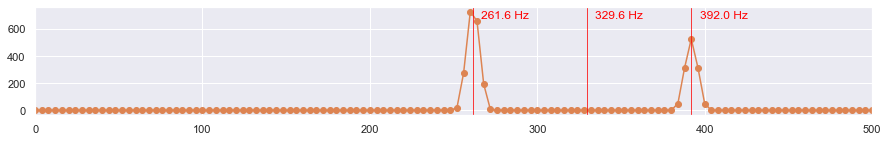

In [747]:
# Find the indices at the edge frequencies.
start, = np.where(freq==300)   # 'where' is very useful function for finding the index, check out more about it
end, = np.where(freq==356)

# Zero out the coefficients in that range.
# We need to remove the positive and negative sides.
S[int(start):int(end)] = 0
S[int(-end):int(-start)] = 0

x, y = freq[:freq.size//2], np.abs(S[:freq.size//2])  # Notice the indexing, we are taking the first half postitive elements for plotting

fig, ax = plt.subplots(figsize=(15, 2))
ax.plot(x, y, 'o-', color='C1')
ax.set_xlim(0, 500)
for note in f:
    ax.axvline(note, c='red', lw=0.75)  #axvline = axes vertical line, will put vertical line, putting vertical red line at frequencies 
    ax.text(note+5, 675, f"{note} Hz", color='red') # putting the text in graph remember ax.text(x,y,text,color)
plt.show()

Let's take the inverse fourier transform of this signal to see how it looks in the time domain now

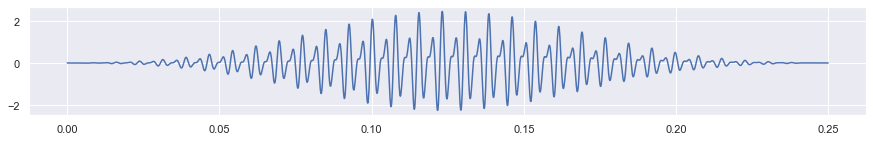

In [748]:
s_filt = np.fft.ifft(S)  #ifft = inverse fast fourier transform
fig, ax = plt.subplots(figsize=(15, 2))
ax.plot(t, s_filt.real)  # notice we are taking real components only
plt.show()

In [749]:
fs = 10e3
Audio(s_filt.real,rate=fs)


Let's make the signal from scratch with just the two frequencies, to check that we get the same result as we got from the frequency domain filtering

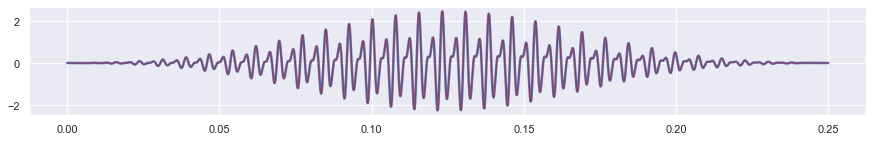

In [750]:
f = np.array([261.6, 392.0])
a = np.array([1.5, 1.0])
s, t = sin_wave(f=f.reshape(2, 1),
                 a=a.reshape(2, 1),
                 duration=0.25,
                 sample_rate=10e3)

s = np.sum(s, axis=0)

fig, ax = plt.subplots(figsize=(15, 2))
ax.plot(t, (s * np.blackman(s.size)), lw=2.5)
ax.plot(t, s_filt.real, '-', c='red', lw=0.5)
plt.show()

So the signals are coming out to be same! It is easy to work in frequency domain than time domain for correcting the frequencies

#### Compression algorithms
Notice how the frequency domain representation of the signal is sparse compared to the time domain representation. In other words, most of its components are very close to zero. This is why Fourier transforms, as well as other methods for casting signals to the frequency domain (e.g. the discrete cosine transform, which is at the heart of JPEG compression), are important in data compression. By representing the data in the frequency domain, many components can be thrown away without affecting the data.

#### Welch's method
The Fourier transform yields the amplitude spectrum. Quite often we want the power spectral density, not the amplitude. This involves squaring the magnitude and dividing by the number of frequency bins... or something. Better to avoid the issue completely by just using SciPy's welch() function. It has the added bonus of returning the one-sided spectrum (i.e. no negative frequencies) by default.

Power spectral density refers to the square of the amplitudes in the amplitude spectrum. see welch's method for more informaation

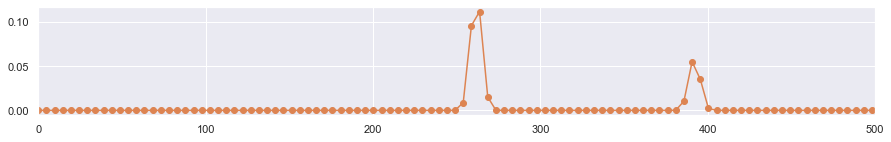

In [751]:
from scipy.signal import welch

f, Pxx = welch(s, fs=10e3, window='blackman', nperseg=2048, noverlap=0.9*2048)

fig, ax = plt.subplots(figsize=(15, 2))
ax.plot(f, Pxx, 'o-', color='C1')
ax.set_xlim(0, 500)
plt.show()

In [752]:
f

array([  0.00000000e+00,   4.88281250e+00,   9.76562500e+00, ...,
         4.99023438e+03,   4.99511719e+03,   5.00000000e+03])

Let's make our signal non stationary as well, non-stationary signal means our frequuecneis/amplitudes/both are changing with respect to time

In [753]:
g = [1,2,54,6,9,0]
g[:2]   
 # for reversing the order

[1, 2]

## Time-frequency representation
We now know how to unweave polytonic signals, but let's introduce another complication — signals whose components change over time. Such signals are said to be nonstationary. For example, think of a monotonic signal whose tone changes at some moment 

In [754]:
f0, f1 = 261.6, 392
s = np.ones_like(t)  # ones_like returns the array of ones  #initialising the array here
s[:t.size//2] *= sin_wave(f0, 1.5, t.max()/2, 10e3)[0]
s[t.size//2:] *= sin_wave(f1, 1.0, t.max()/2, 10e3)[0]

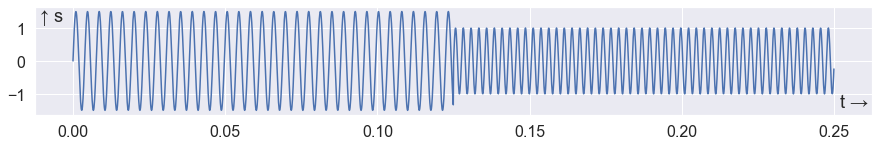

In [755]:
fig, ax = plt.subplots(figsize=(15, 2))
ax.plot(t, s)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.text(-0.011, 1.2, "↑ s", fontsize=18)
ax.text(0.252, -1.4, "t →", fontsize=18)
plt.show()

In [756]:
fs = 10e3
Audio(s,rate=fs)

In [757]:
# Calculating the Fourier transform like before
s *= np.blackman(s.size)  #for tapering our signal
S = np.fft.fft(s)         # taking the f.t
freq = np.fft.fftfreq(s.size, d=1/10e3)  # extracting the fourier frequency

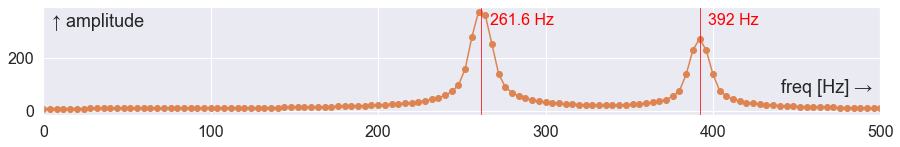

In [758]:
x, y = freq[:freq.size//2], np.abs(S[:freq.size//2])

fig, ax = plt.subplots(figsize=(15, 2))
ax.plot(x, y, 'o-', color='C1')
ax.set_xlim(0, 500)
for note in (f0, f1):
    ax.axvline(note, c='red', lw=0.75)
    ax.text(note+5, 325, f"{note} Hz", color='red', size=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.text(5, 320, "↑ amplitude", fontsize=18)
ax.text(495, 70, "freq [Hz] →", fontsize=18, ha='right')
plt.show()

## Important!
It looks very similar to the spectrum we made before, but without the middle frequency. The peaks are a bit more spread out because the duration of each waveform is half what it was (the general uncertainty principle spreads signals out in frequency as they become more compact in time).

The point is that there's not much difference between the spectrum of two mixed signals, and the spectrum of two consecutive signals. If we care about the localization of signals in time (we do!), this is a problem. One solution is to turn to time–frequency representations. by attempting to break the signal down in time and frequency simultaneously, they offer a way to enjoy the advantages of both domains at the same time.

#### Spectrogram
Python's matplotlib plotting library offers a convenient way of making a time–frequency plot, also known as a spectrogram. In a single line of code, it produces a 2D image plot showing frequency against time.

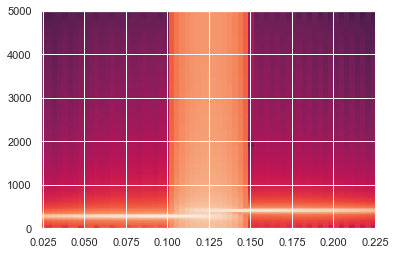

In [759]:
_ = plt.specgram(s, Fs=10e3,NFFT=512, noverlap=480)  

# check this out - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.specgram.html
# it takes the data 's', Fs = sampling rate 


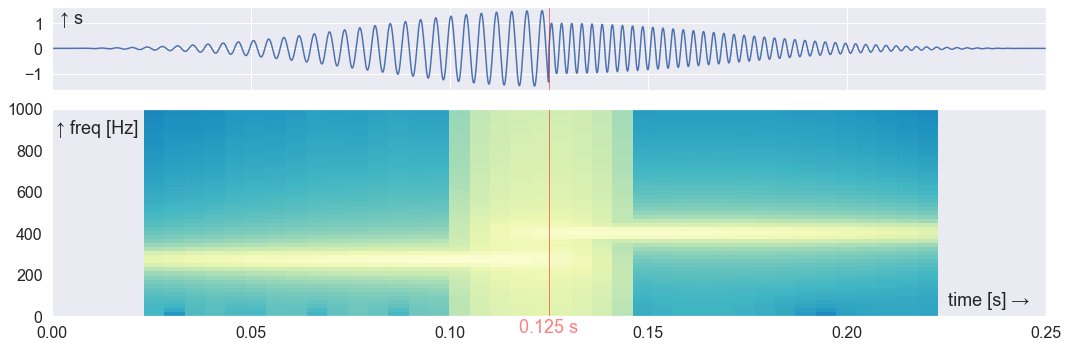

In [760]:
fig, axs = plt.subplots(figsize=(15, 5), nrows=2, gridspec_kw={'height_ratios':[2, 5]})

axs[0].plot(t, s)
axs[0].set_xlim(0, 0.25)
axs[0].tick_params(axis='both', which='major', labelsize=16)
axs[0].set_xticklabels([])
axs[0].text(0.002, 1.0, "↑ s", fontsize=18)
axs[0].axvline(0.125, color='red', alpha=0.5, lw=1)

# Notice this cool thing below
*_, im = axs[1].specgram(s, Fs=10e3, NFFT=512, noverlap=0.9*512, cmap='YlGnBu_r', mode='magnitude', vmax=0)
axs[1].tick_params(axis='both', which='major', labelsize=16)
#cbar = plt.colorbar(im, aspect=10)
#cbar.ax.tick_params(labelsize=12) 
axs[1].set_xlim(0, 0.25)
axs[1].set_ylim(0, 1000)
axs[1].grid(alpha=0.3)
axs[1].grid(False)
axs[1].text(0.001, 880, "↑ freq [Hz]", fontsize=18)
axs[1].text(0.246,  50, "time [s] →", fontsize=18, ha='right')
axs[1].text(0.125,  -80, "0.125 s", fontsize=18, ha='center', color='red', alpha=0.5)
axs[1].axvline(0.125, color='red', alpha=0.5, lw=1)

plt.tight_layout()
plt.show()

#### Note - we can play with sliding window and overlapping length to see how it changes our output
The plot uses an algorithm called the short-time Fourier transform, or STFT. This simply makes a Fourier transform in a sliding window of length NFFT, with noverlap points overlapping on the previous window. We want NFFT to be long to get good frequency resolution, and we want noverlap to be large to get good time resolution.

Notice that we cannot quite see the exact frequency of the components — they don't last long enough to pin them down. And there's a bit of uncertainty about the timing of the transition, because to get decent frequency resolution we need a longish segment of the signal (512 samples in this case) — so we lose timing information. But overall, this plot is an improvement over the spectrum alone: we can see that there are at least 2 strong signals, with frequencies of about 250 and 400 Hz, and that the change happens at about 0.125 s.

In [761]:
s = np.loadtxt('piano-ftanalysis.txt')
fs = 22050

In [762]:
Audio(s, rate=fs)

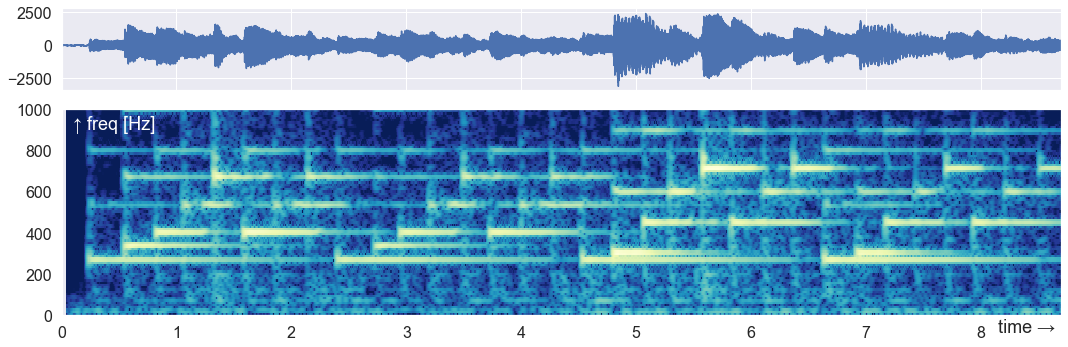

In [763]:
# Make a time basis.
t = np.linspace(0, s.size/fs, s.size)

# Make the figure.
fig, axs = plt.subplots(figsize=(15, 5), nrows=2, gridspec_kw={'height_ratios':[2, 5]})
axs[0].plot(t, s)
axs[0].set_xlim(0, 8.7)
axs[0].set_xticklabels([])
axs[0].tick_params(axis='both', which='major', labelsize=16)

_ = axs[1].specgram(s, Fs=fs, NFFT=2048, noverlap=0.9*2048, cmap='YlGnBu_r', vmin=-20 )
#plt.colorbar()
axs[1].set_ylim(0, 1000)
axs[1].set_xlim(0, 8.7)
axs[1].grid(False)
axs[1].text(8.65, -80, "time →", fontsize=18, ha='right')
axs[1].text(0.1, 900, "↑ freq [Hz]", fontsize=18, color='white')
axs[1].tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
plt.show()

#### COOL!
Finally, here's a volcanic 'scream' — a harmonic tremor preceeding an explosive eruption at Mt Redoubt, Alaska, in March 2009. It sounds incredible in audio, but the spectrogram is interesting too. In contrast to the bat chirp, this 15-minute-long time series has to be sped up in order to hear it.

In [764]:
s = np.loadtxt('Tremor_volcano.txt')
fs = 100

Audio(s, rate=fs*40)  # Speed it up 40x.

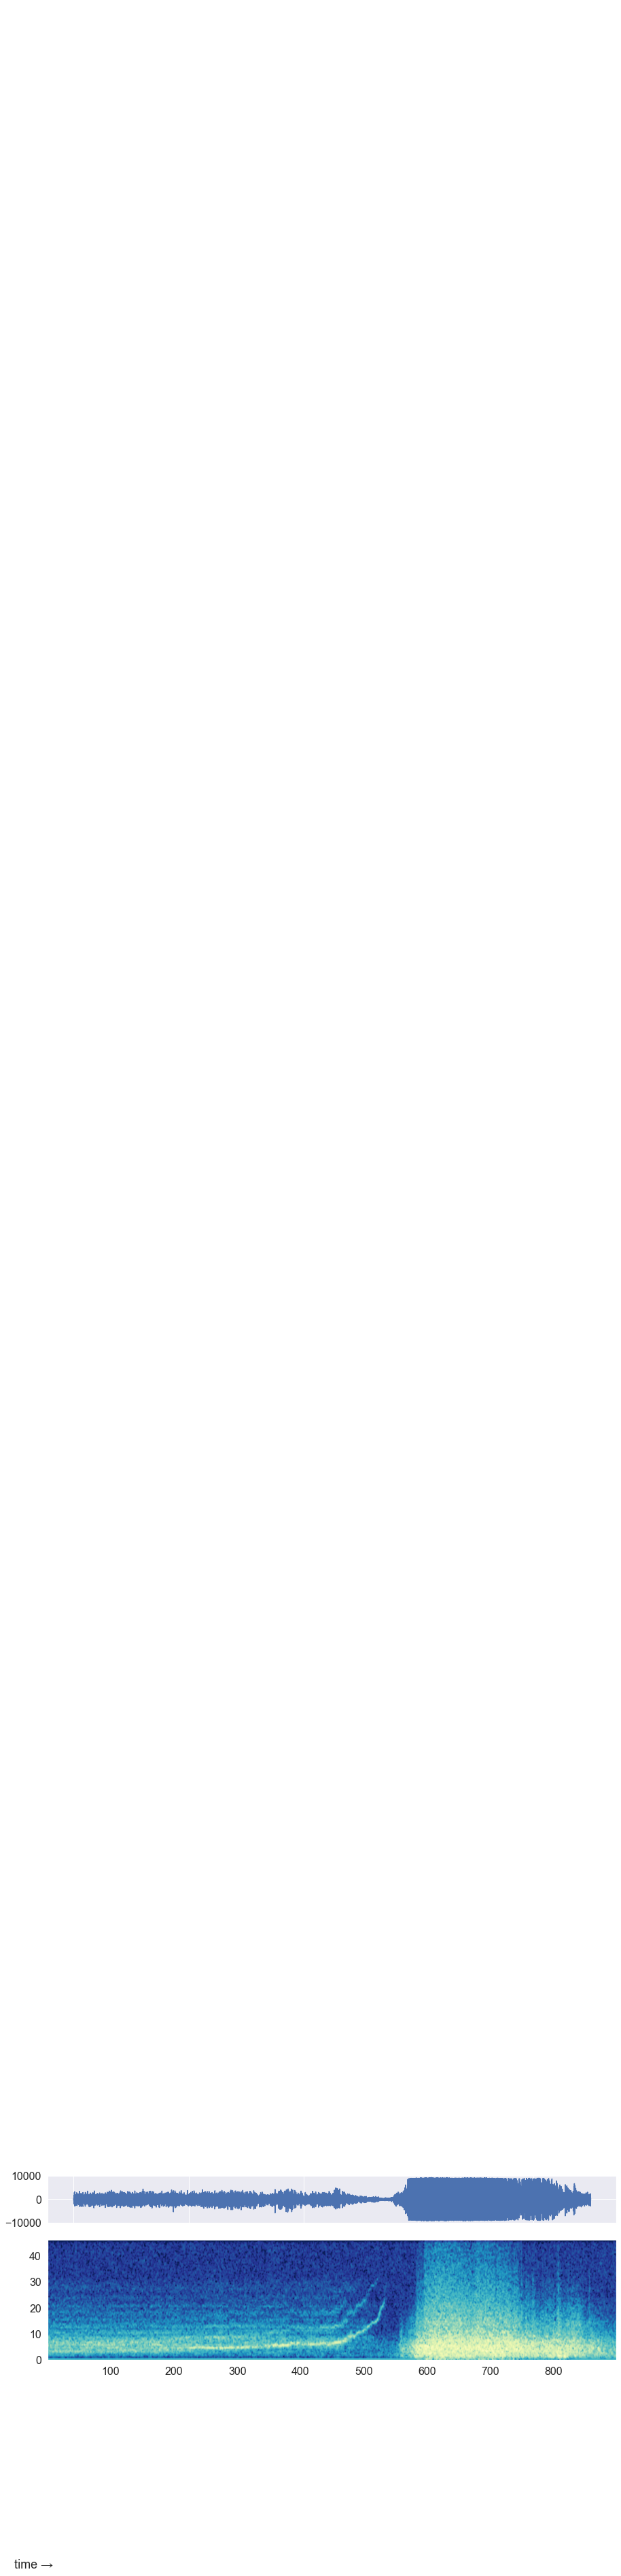

In [765]:
# Make a time basis.
t = np.linspace(0, s.size/fs, s.size)

# Make the figure.
fig, axs = plt.subplots(figsize=(15, 5), nrows=2, gridspec_kw={'height_ratios':[2, 5]})
axs[0].plot(t, s)
axs[0].set_xticklabels([])
axs[0].tick_params(axis='both', which='major', labelsize=16)

*_, im = axs[1].specgram(s, Fs=fs,cmap='YlGnBu_r', vmin=10, interpolation='bicubic' )
#plt.colorbar()
axs[1].set_ylim(0, 46)
axs[1].grid(False)
axs[1].text(8.65, -80, "time →", fontsize=18, ha='right')
axs[1].text(0.1, 900, "↑ freq [Hz]", fontsize=18, color='white')
axs[1].tick_params(axis='both', which='major', labelsize=16)
plt.show()

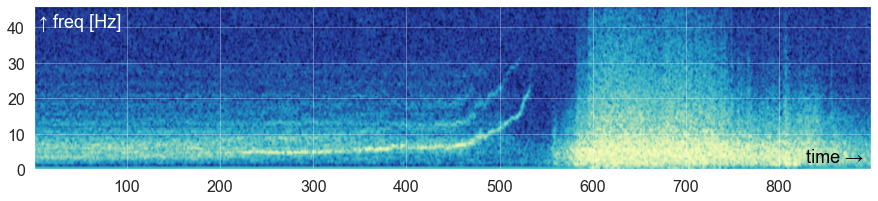

In [766]:
fig, ax = plt.subplots(figsize=(15, 3))
*_, im = ax.specgram(s, Fs=fs, cmap='YlGnBu_r', vmin=10, interpolation='bicubic')
ax.set_ylim(0, 46)
ax.text(890, 2, "time →", fontsize=18, ha='right', color='black')
ax.text(5, 40, "↑ freq [Hz]", fontsize=18, color='white')
ax.tick_params(axis='both', which='major', labelsize=16)
plt.grid(alpha=0.3)
plt.show()

Now we see an interesting activity here, before the occurence of a volcanic eruption, the lines of frequency rise and there is a brief movement of silence 

#### Example of the Recent Earthquake
Let's take seismic data of recent earthquake, remove the instrument response from it and output the 

In [767]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

Ok so now we will plot the instrument corrected vertical component displacement plot of Mww 7.6 Alaska earthquake, occured on 2020-10-19 20:54:39 UTC, recorded at the Nearest seismic station "KODAK ISLAND"

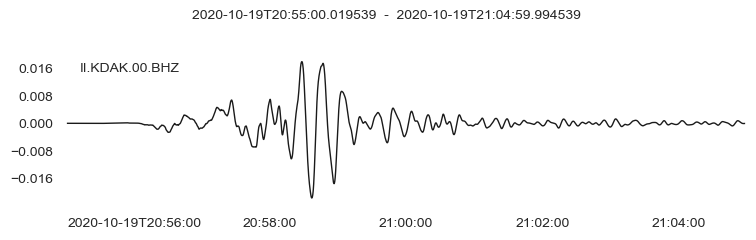

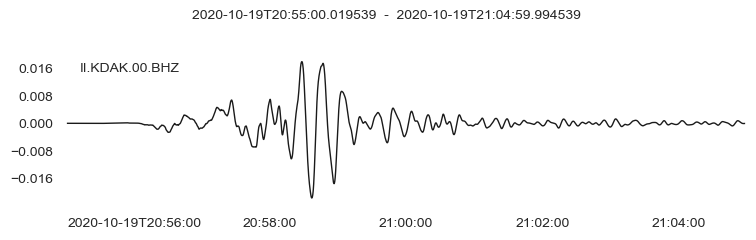

In [768]:
client="IRIS"
network="II"
station="KDAK"
Lococode="00"
Channel="BHZ"
starttime="2020-10-19T20:55:00.000"
endtime="2020-10-19T21:05:00.000"
t1=UTCDateTime(starttime)
t2=UTCDateTime(endtime)
client=Client(client)
st=client.get_waveforms(network,station,Lococode,Channel,t1,t2)

inv = client.get_stations(network="II",station="KDAK",location=Lococode,channel=Channel,starttime=starttime,endtime=endtime,level="response")
IIBHZ = st.copy().remove_response(inventory=inv, output="DISP")
IIBHZ.plot()

In [769]:
eq = np.array(IIBHZ[0].data)
fs = 40  # sampling rate

In [770]:
eq.size

24000

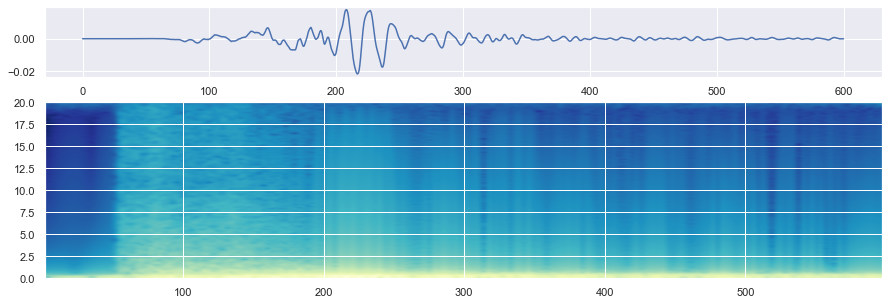

In [771]:
t = np.linspace(0,eq.size/fs,eq.size)
fig, axs = plt.subplots(figsize=(15,5),nrows=2,gridspec_kw={'height_ratios': [2,5]})
axs[0].plot(t,eq)
*_,im = axs[1].specgram(eq,Fs=fs,cmap='YlGnBu_r',interpolation='bicubic') #plotting the spectrogram
plt.show()   # Notice the lower frequencies are dominant

In [772]:
Audio(eq, rate=fs*75)  # the signal contains very low frequencies, that's why it can't be heard

In [773]:
t

array([  0.00000000e+00,   2.50010417e-02,   5.00020834e-02, ...,
         5.99949998e+02,   5.99974999e+02,   6.00000000e+02])

In [774]:
Seq = np.fft.fft(eq)
freq = np.fft.fftfreq(eq.size, d=1/40)

(0, 1)

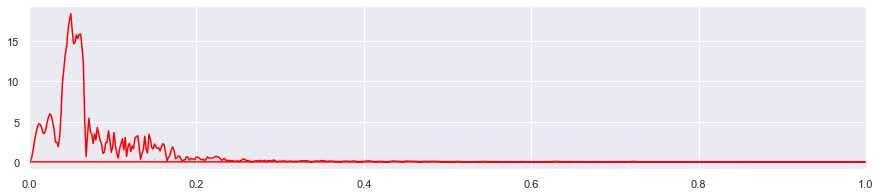

In [775]:
plt.figure(figsize=(15,3))
plt.plot(freq,abs(Seq),color='red')
plt.xlim(0,1)

#given below is the frequency spetrum of our signal

Text(500, 0.005, 'Mww 7.6 Alaska Earthquake 2020-10-19 20:54:39 UTC(filtered b/n 0.1 and 0.2 Hz) ')

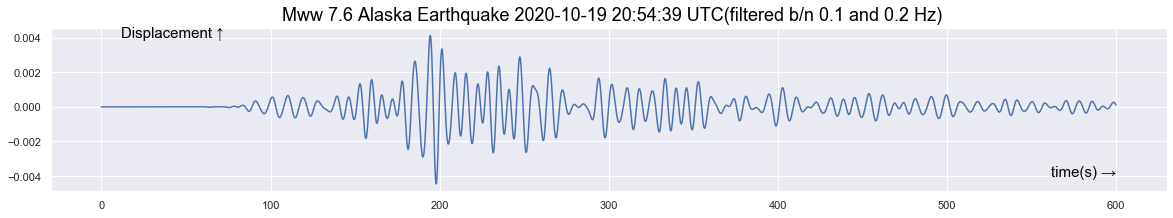

In [776]:
eq1 = IIBHZ.filter("bandpass", freqmin=0.1, freqmax=0.2)
plt.figure(figsize=(20,3))
plt.plot(t,eq1[0].data)
plt.text(600, -0.004, "time(s) →", fontsize=15, ha='right', color='black')
plt.text(75, 0.004, "Displacement ↑ ", fontsize=15, ha='right', color='black')
plt.text(500, 0.005, "Mww 7.6 Alaska Earthquake 2020-10-19 20:54:39 UTC(filtered b/n 0.1 and 0.2 Hz) ", fontsize=18, ha='right', color='black')

(0, 1)

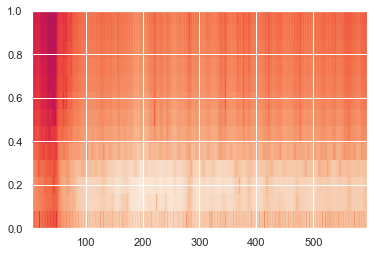

In [777]:
_ = plt.specgram(eq1[0].data, Fs=40,NFFT=512, noverlap=480)  
plt.ylim(0,1)
# check this out - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.specgram.html
# it takes the data 's', Fs = sampling rate 

(0, 1)

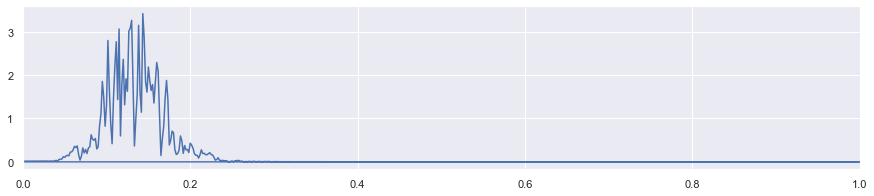

In [778]:
Seq1=np.fft.fft(eq1[0].data)
freq1 = np.fft.fftfreq(eq.size, d=1/40)
plt.figure(figsize=(15,3))
plt.plot(freq1,abs(Seq1))
plt.xlim(0,1)

## Acknowledgments
The piano recording from BWV846 by Bach is licensed CC-BY by Kimiko Ishizaka on welltemperedclavier.org. The bat chirp data is licensed CC-BY-NC by freesound.org user klankschap. Thank you to Alicia Hotovec-Ellis for her help with the Mt Redoubt data, recorded by the USGS Alaska Volcano Observatory.